# **Spotify Song Popularity Prediction**

---

## Table of contents

1. [Introduction](#introduction)  
2. [License](#license)  
3. [Required libraries](#required-libraries)  
4. [Problem domain](#problem-domain)  
5. [Step 1: Data Overview](#step1)  
6. [Step 2: Checking for Missing Values and Basic Cleaning](#step2)  
7. [Step 3: Exploratory Data Analysis](#step3)   
8. [Step 4: Preparing Data for Modeling](#step4)  
9. [Step 5: Splitting the Dataset](#step5) 
10. [Step 6: Data Preprocessing](#step6) 
11. [Step 7: Baseline and Advanced Modeling](#step7)  
    •	Linear Regression
	•	Random Forest Regressor
	•	XGBoost Regressor
12. [Conclusions](#conclusions)  
13. [Acknowledgements](#acknowledgements)

---

<a id="introduction"></a>
## Introduction

This report aimes at predicting the popularity of Spotify songs using a variety of numeric and categorical features. The main objective was to build and compare regression models that could accurately forecast a track’s popularity score (labeled as pop in the dataset). By carefully cleaning the data, engineering relevant features, and tuning multiple models, we sought to determine which learning algorithm could best generalize to unseen songs.

The dataset under study contained columns representing several audio and metadata attributes: tempo (bpm), loudness (dB), danceability (dnce), valence (val), energy (nrgy), acousticness (acous), speechiness (spch), release year (year), and others. We combined these numeric columns with basic categorical features (artist name and top genre) to form predictive inputs for a regression approach, using linear regression, random forest and XGBoost models. Finally, we measured performance using the Root Mean Squared Error (RMSE), which is well-suited to penalizing large prediction errors.
Throughout the analysis, we used boxplots and histograms for visualizing the distribution of features and identifying outliers, correlation analysis to understand the relationships among variables, and a learning curve to assess how each model’s performance might improve (or plateau) as the training set size increases. These steps collectively helped us refine the feature set, transform skewed data, and compare modeling approaches with greater confidence.

---

<a id="license"></a>
## License
Data from : [Kaggle Spotify dataset]( https://www.kaggle.com/competitions/cs-985-6-spotify-regression-problem-2025/overview)”. 

---

<a id="required-libraries"></a>
## Required libraries

Below are the required libraries for this project, the main libraries used here include:

- **Numpy** and **Pandas**: for data manipulation and basic data structures.
- **Matplotlib** and **Seaborn**: for plotting and visualisations.
- **Scikit-learn**: for machine learning pipelines, transformations, and modelling.
- **XGBoost**: for advanced boosting-based regression.
---


In [2]:
#basic libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy

#plotting libraries
import matplotlib
%matplotlib inline
from matplotlib.pyplot import figure
import seaborn as sns

#importing libraries we will use for our models 

#data prep
from sklearn import preprocessing
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import TransformedTargetRegressor
#eval
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
#models
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn import preprocessing
from sklearn.preprocessing import FunctionTransformer

<a id="problem-domain"></a>
## **The Problem Domain**

Spotify is a big platform for music streaming, and each song has a pop (popularity) metric. This metric captures how many plays a track receives, its skip rate, playlist additions, and more internal calculation in this dataset. The task is to train a regression model that predicts this popularity given numeric and categorical features. Among these features:

```
•    year: The year the track was released .
•    bpm: The tempo of the track in beats per minute.
•    nrgy: The energy level.
•    dnce: Danceability measure from 0–100.
•    dB: Loudness in decibels.
•    dur: Duration of the track in seconds.
•    acous: Acousticness measure (0–100).
•    spch: Speechiness measure (0–100).
•    val: Valence measure (the general positivity).
```

We have two datasets: a training set with 453 rows (after cleaning, we end up with 438) and a test set with 114 rows. Our goal is to build a reliable model that can generalize well and predict pop in the test set based on our training set.

<a id="step1"></a>
## **Step 1: Data Overview**

We began by loading two CSV files: one labeled as the training set (CS98XRegressionTrain.csv) and one as the test set (CS98XRegressionTest.csv). The training set contained 453 rows and 15 columns prior to cleaning, while the test set had 114 rows and 14 columns. An inspection with info() showed that both sets included integer, float, and object columns. The three primary object columns were title, artist, and top genre.

We also confirmed that the pop column, representing the popularity score, appeared to have valid integer data for all rows in the training set. No additional columns in the test set directly corresponded to popthat is the target variable we needed to predict.

In [3]:
data_train=pd.read_csv("CS98XRegressionTrain.csv")
data_test= pd.read_csv('CS98XRegressionTest.csv')

# A quick glance of the data
data_columns=len(data_train.columns)
data_rows=len(data_train)
print('There are {} columns in data_train'.format(data_columns))
print('\nThere are {} rows in data_train'.format(data_rows))

data_train.info()
data_test.info()

data_train.head(10)

There are 15 columns in data_train

There are 453 rows in data_train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         453 non-null    int64 
 1   title      453 non-null    object
 2   artist     453 non-null    object
 3   top genre  438 non-null    object
 4   year       453 non-null    int64 
 5   bpm        453 non-null    int64 
 6   nrgy       453 non-null    int64 
 7   dnce       453 non-null    int64 
 8   dB         453 non-null    int64 
 9   live       453 non-null    int64 
 10  val        453 non-null    int64 
 11  dur        453 non-null    int64 
 12  acous      453 non-null    int64 
 13  spch       453 non-null    int64 
 14  pop        453 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 53.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 14 columns):
 #   C

,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,My Happiness,Connie Francis,adult standards,1996,107,31,45,-8,13,28,150,75,3,44
1,2,Unchained Melody,The Teddy Bears,NaN,2011,114,44,53,-8,13,47,139,49,3,37
2,3,How Deep Is Your Love,Bee Gees,adult standards,1979,105,36,63,-9,13,67,245,11,3,77
3,4,Woman in Love,Barbra Streisand,adult standards,1980,170,28,47,-16,13,33,232,25,3,67
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,glam rock,1973,121,47,56,-8,15,40,193,45,3,63
5,6,Grenade,Bruno Mars,pop,2010,110,56,71,-7,12,23,223,15,6,74
6,7,No Time,The Guess Who,album rock,1971,128,48,48,-14,5,12,219,8,6,44
7,8,End Of The Road,Boyz II Men,boy band,1991,150,43,64,-9,6,53,351,7,2,71
8,9,Someone Elses Roses,Joan Regan,NaN,2019,100,14,29,-10,15,32,143,89,3,34
9,10,You Belong to My Heart,Timi Yuro,adult standards,2013,108,39,46,-10,16,50,126,82,3,35


In [4]:
data_train['artist'].duplicated().value_counts()

artist
False    345
True     108
Name: count, dtype: int64

<a id="step2"></a>
## Step 2: Checking for Missing Values and Basic Cleaning

This code segment determines the total number of missing entries in both the training and test datasets, identifies which rows have null values in the top genre column, and removes those rows from the training set. The test set is checked for missing data but remains otherwise unchanged.

In [5]:
# Missing values
n_missing=data_train.isnull().sum().sum()
print('We have {} values missing from the training data.'.format(n_missing))

n_missing_test=data_test.isnull().sum().sum()
print('We have {} values missing from the testing data'.format(n_missing_test))

missing_values=data_train.loc[data_train['top genre'].isnull() == True]
missing_values

data_test.isnull().any()

# Drop missing rows in the training set
data_train=data_train.dropna()

data_test.isnull().any()

data_test

We have 15 values missing from the training data.
We have 1 values missing from the testing data


,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch
0,454,Pump It,The Black Eyed Peas,dance pop,2005,154,93,65,-3,75,74,213,1,18
1,455,"Circle of Life - From ""The Lion King""/Soundtra...",Elton John,glam rock,1994,161,39,30,-15,11,14,292,26,3
2,456,We Are The Champions - Remastered 2011,Queen,glam rock,1977,64,46,27,-7,12,18,179,38,3
3,457,Insomnia - Radio Edit,Faithless,big beat,2010,127,92,71,-9,37,53,216,6,4
4,458,This Eve of Parting,John Hartford,appalachian folk,2018,115,46,56,-12,21,34,153,18,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,563,Candy Shop,50 Cent,east coast hip hop,2005,125,57,61,-8,38,76,209,3,47
110,564,Dragostea Din Tei - Italian Version,O-Zone,bubblegum dance,2010,130,89,67,-6,10,80,215,4,3
111,565,Big Poppa - 2005 Remaster,The Notorious B.I.G.,east coast hip hop,1994,84,58,78,-7,14,76,253,43,27
112,566,YMCA - Original Version 1978,Village People,disco,1978,127,97,72,-5,12,73,287,6,14


<a id="step3"></a>
## Step 3: Exploratory Data Analysis

With the training data trimmed down to 438 rows, we performed an exploratory data analysis to better understand the distributions and correlations.

This section explores the dataset’s distribution and relationships between features. Histograms visualize the distribution of numerical variables, while a correlation matrix identifies features most associated with popularity (pop). Violin plots provide insights into feature distributions, and boxplots highlight outliers. Additionally, scatterplots help visualize the relationships between individual features and the target variable, aiding in feature selection and transformation decisions.

1.	**Histograms** of key features (nrgy, dnce, dB, acous) showed that some were reasonably symmetric, while others (like live and spch) were more skewed.

2.	A **correlation matrix** indicated that some variables had positive correlations with pop. Notably, dur (duration), nrgy, and dB (loudness) correlated positively with popularity, while acousticness (acous) correlated negatively. This provided early clues that well-produced, loud, and energetic songs may be more popular.

3.	**Violin plots** and **boxplots** for continuous variables further demonstrated skewed distributions in a few features, suggesting that transformations might help the model. Some outliers for dur and dnce also appeared, though not severe enough to remove.


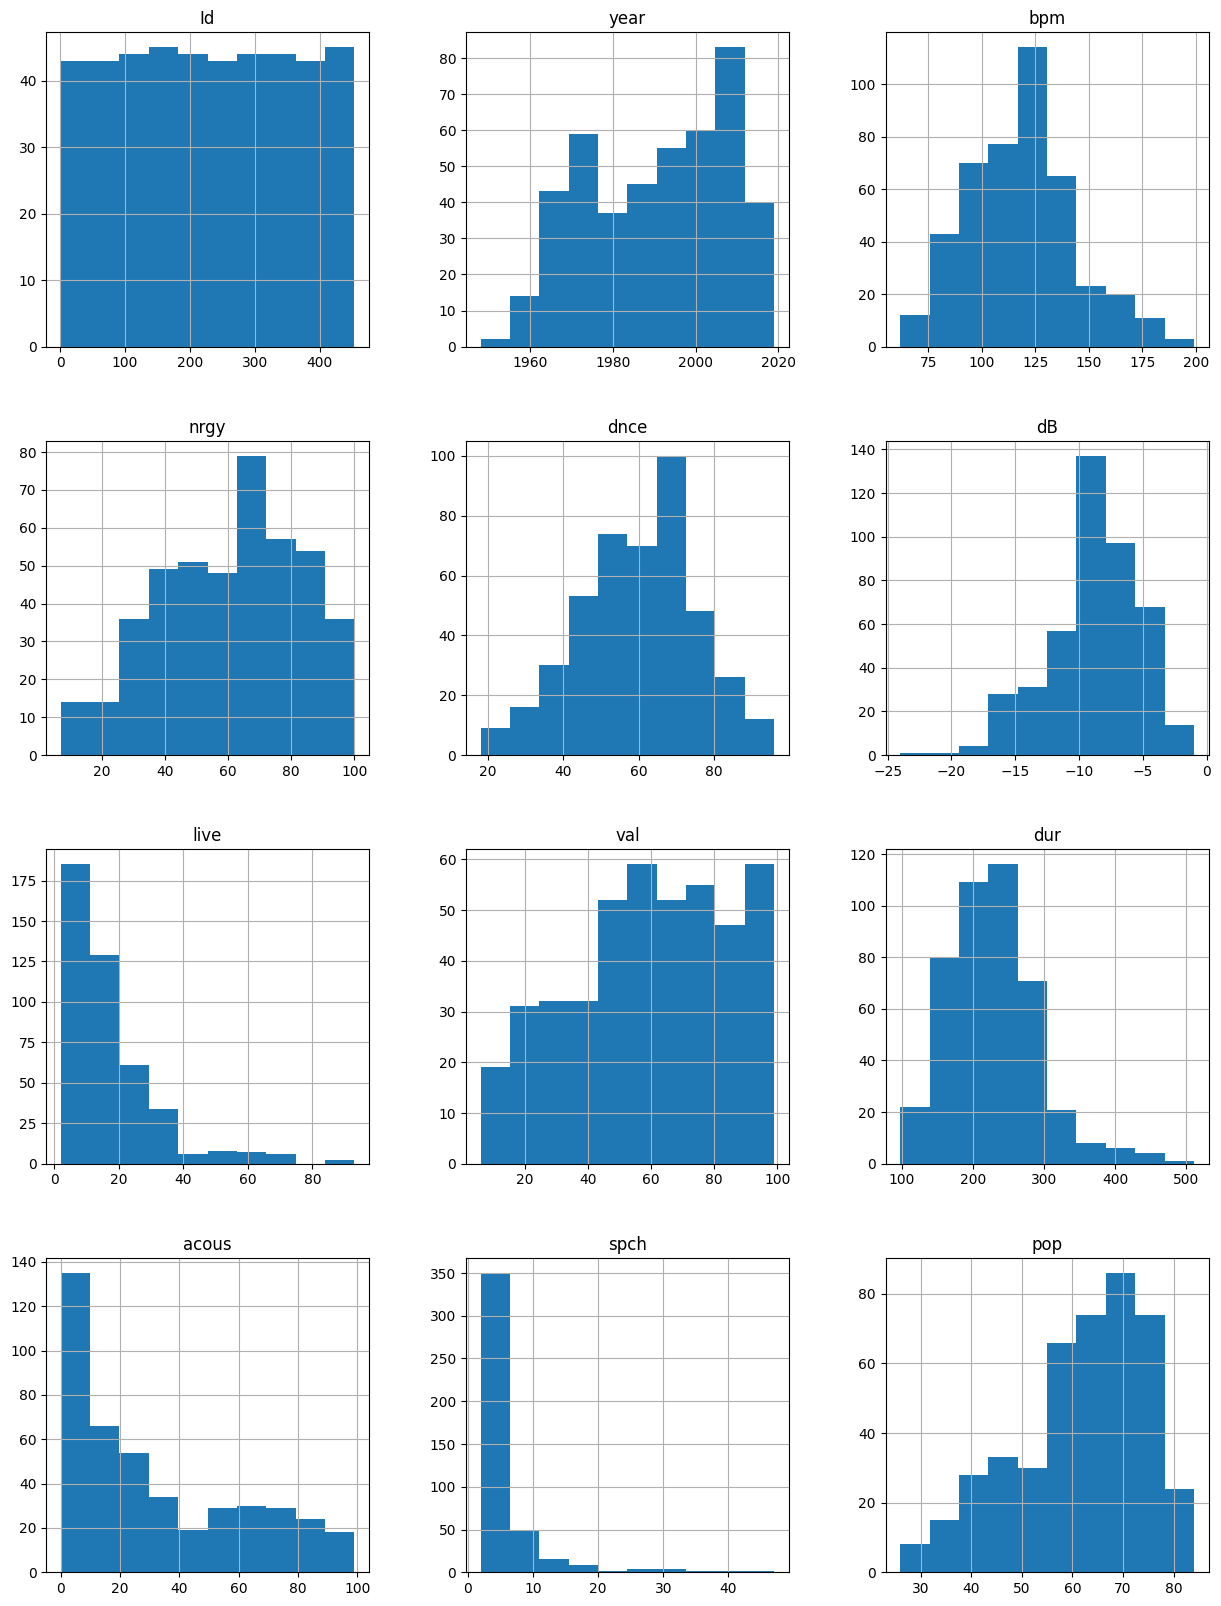

An inbalanced data like spch live are both right skewed


In [6]:
data_train.hist(bins=10,figsize=(15,20))
plt.show()
print("An inbalanced data like spch live are both right skewed")

We then prepare numeric-only data (excluding text columns like title and artist) and check correlation with the pop target:

In [7]:
num_data_train= data_train.drop(columns=['title','artist','top genre'])
num_data_train.head(10)

,Id,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,1996,107,31,45,-8,13,28,150,75,3,44
2,3,1979,105,36,63,-9,13,67,245,11,3,77
3,4,1980,170,28,47,-16,13,33,232,25,3,67
4,5,1973,121,47,56,-8,15,40,193,45,3,63
5,6,2010,110,56,71,-7,12,23,223,15,6,74
6,7,1971,128,48,48,-14,5,12,219,8,6,44
7,8,1991,150,43,64,-9,6,53,351,7,2,71
9,10,2013,108,39,46,-10,16,50,126,82,3,35
10,11,2001,98,74,72,-3,17,93,224,12,3,63
11,12,1985,87,66,63,-9,7,75,343,12,3,68


In [8]:
corr_matrix=num_data_train.corr()
corr_matrix["pop"].sort_values(ascending=False)

pop      1.000000
dur      0.321028
dB       0.312952
nrgy     0.274006
dnce     0.256099
spch     0.130346
Id       0.072073
bpm      0.042695
year     0.018926
live    -0.025493
val     -0.040035
acous   -0.443763
Name: pop, dtype: float64

<Axes: >

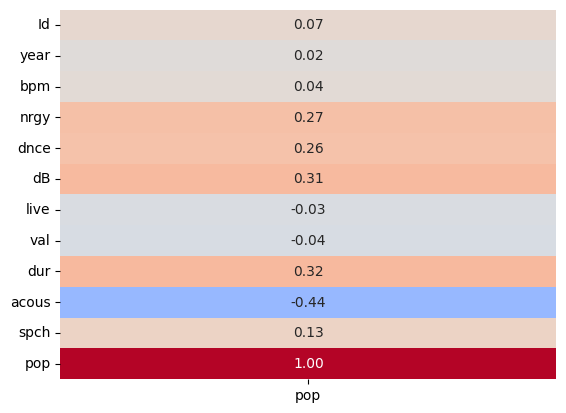

In [9]:
#Correlation matrix to see any relation to the variable POP
pop_correlation=corr_matrix["pop"]
sns.heatmap(pop_correlation.to_frame(), annot=True, cmap='coolwarm', center=0, fmt=".2f", cbar=False)

In [10]:
print("From the correlation matrix, we can see that:")
print("Positive correlation: dur, dB, nrgy, dnce, spch")
print("Negative correlation: val, live, year, acous")
print("It seems like popular songs are: less acoustic, longer duration, louder")

From the correlation matrix, we can see that:
Positive correlation: dur, dB, nrgy, dnce, spch
Negative correlation: val, live, year, acous
It seems like popular songs are: less acoustic, longer duration, louder


Visual check via a violin plot:

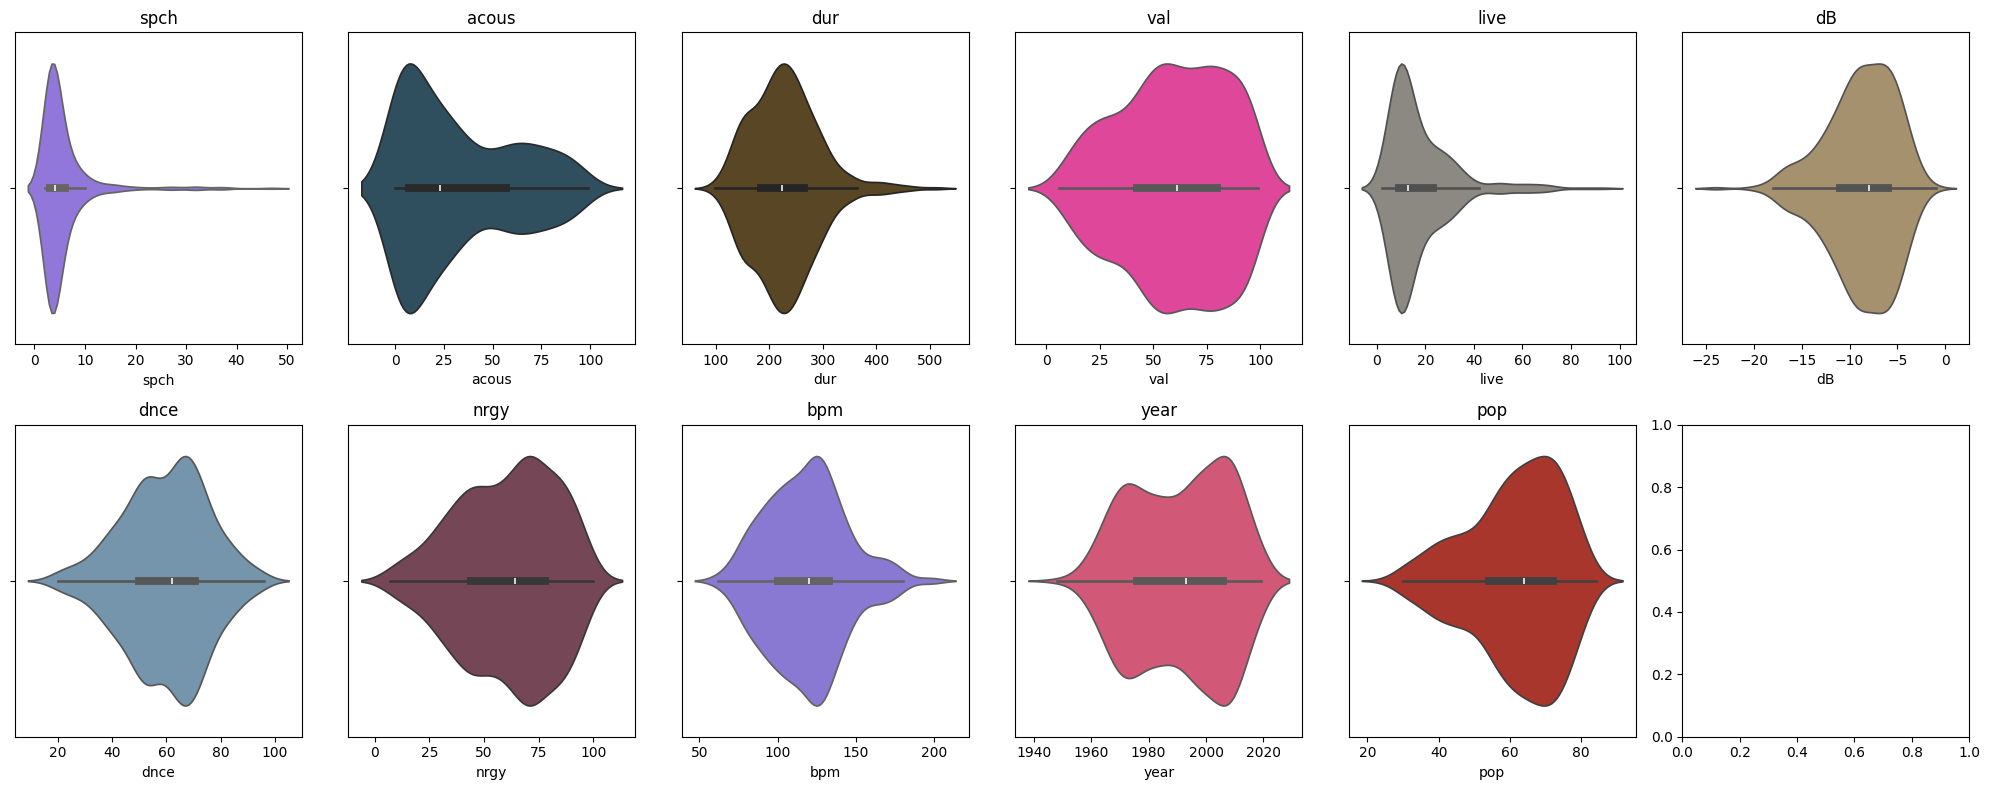

In [11]:
def plot_violinplots(data, features):
    fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(20, 8))
    axes = axes.ravel()  
    
    for i, feature in enumerate(features):
        color = np.random.rand(3,)  
        sns.violinplot(x=data[feature], ax=axes[i], color=color)
        axes[i].set_title(feature)
    
    plt.tight_layout()
    plt.show()

# Example usage:
my_features = ['spch','acous','dur','val','live','dB','dnce','nrgy','bpm','year','pop']
plot_violinplots(data_train, my_features)

Function to plot some summary stats and relationships for a selected feature vs. the target:

In [12]:
def feature_plotting(feature_name, target):

  colour = np.random.rand(3,)

  print('Summary stats for {}:\n'.format(feature_name) )
  print(data_train[feature_name].describe())
  plt.show()
  print('\nBoxplot will show us spread and highlight outliers:\n')
  sns.boxplot(x = data_train [feature_name], color = colour)
  plt.show()
  print('\nScatterplot will show us relationship between {} and {}:\n'.format(feature_name, target))
  sns.scatterplot(data=data_train,x = data_train[feature_name], y = data_train[target], color = colour)
  plt.show()

Summary stats for dur:

count    438.000000
mean     228.267123
std       63.426812
min       98.000000
25%      184.500000
50%      224.000000
75%      264.000000
max      511.000000
Name: dur, dtype: float64

Boxplot will show us spread and highlight outliers:



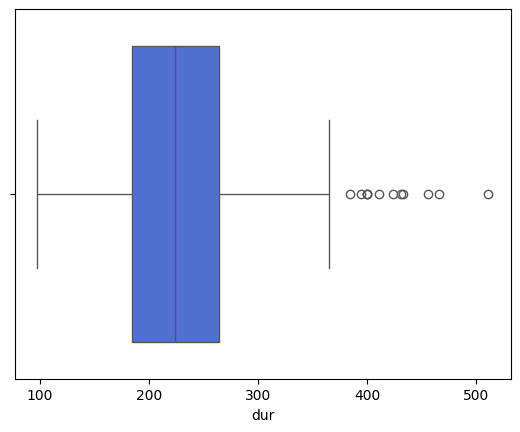


Scatterplot will show us relationship between dur and pop:



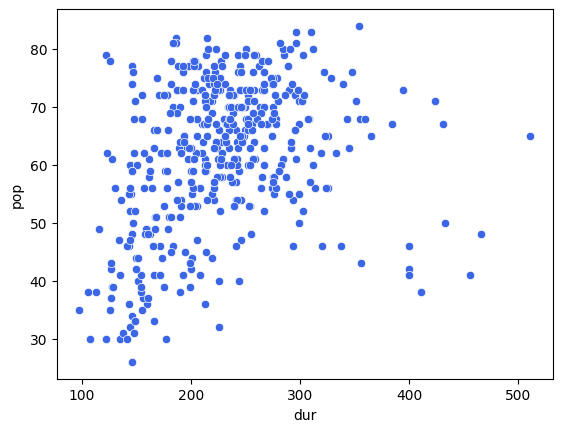

In [13]:
feature_plotting('dur','pop')

<a id="step5"></a>
## Step 5: Feature Engineering

This step focuses on preparing the dataset for machine learning by splitting, transforming, and encoding the data appropriately.

#### Train-Test Splitting 
The function train_test() separates the dataset into training and testing sets, ensuring that transformations applied to training data do not affect the raw test set. If make_copy=True, deep copies of the datasets are created to prevent accidental modifications. The function removes the target variable (pop) from the training features while keeping it in y_train, and also drops unnecessary columns from both datasets.

#### Feature Scaling and Transformation
To ensure features are on a comparable scale, transform_features() applies either standard scaling (zero mean, unit variance) or power transformation (reducing skewness). For training data, scalers are fitted and stored in a dictionary, which is later applied to the test set to avoid data leakage.

#### Encoding Categorical Variables
Since machine learning models typically require numerical inputs, label_encoding() converts categorical features (artist, top genre) into integer values. A LabelEncoder is trained on the combined training and test data to ensure consistency in encoding.

#### Powertransformer  and Logarithm Transformations
The powertransformer are used to handle inbalance data because Features with a long tail will be replaced by their logarithm, as most models prefer features with roughly uniform or Gaussian distributions.

Functions log_transform() and inverse_transform() provide optional log transformations to stabilize variance in features or predictions.

This preprocessing step ensures that all features are scaled, encoded, and formatted properly before model training, reducing bias from feature magnitudes and improving model generalizability.

In [14]:
#Slpliting dataset
def train_test(train_data, test_data, target, dropping_columns, make_copy=False):
    if make_copy:
        train_data = copy.deepcopy(train_data)
        test_data = copy.deepcopy(test_data)
    
    X_train = train_data.drop(target, axis=1)
    y_train = train_data[target]
    X_test = test_data.drop(dropping_columns, axis=1)
    X_train = X_train.drop(dropping_columns, axis=1)
    
    return X_train, y_train, X_test

In [15]:
#Applying scalling transformation
def transform_features(df, columns, transformer_name, transf_dict):
  #function for scaling or normalising specified features

  if transf_dict is None:

    if transformer_name == 'Standard':
      transf = preprocessing.StandardScaler()
  
    elif transformer_name == 'PowerTransformer':
      transf = preprocessing.PowerTransformer()
  
    #make a dictionary of the fitted transformer so that we can use training scales for testing data

    transf_dict = {}
    
    for col in columns:
      col_transf = copy.deepcopy(transf)
      col_transf = col_transf.fit(df[[col]])
      df[col] = col_transf.transform(df[[col]])
      transf_dict[col] = col_transf
	
  else:
    for col in columns:
      transf = transf_dict.get(col)
      df[col] = transf.transform(df[[col]])
    
    return df

  return df, transf_dict #returning dictionary and df with scaled features

In [16]:
#Label encoding for categorical features
def label_encoding(X_train, X_test, column):
    train_len = len(X_train)
    label_encoder = preprocessing.LabelEncoder()
    
    full_data = pd.concat([X_train[column], X_test[column]], axis=0, ignore_index=True)
    full_data_enc = label_encoder.fit_transform(full_data.values)
    
    X_train_enc = full_data_enc[:train_len]
    X_test_enc = full_data_enc[train_len:]
    
    return X_train_enc, X_test_enc, label_encoder

In [17]:
#Logarithmic and exponential transformation
def log_transform(x):
    return np.log(x)

def inverse_transform(x):
    return np.exp(x)

In [18]:
#Crossvalidation Scores
def display_scores(scores, negative_result=False):
    if negative_result:
        scores = np.array([abs(x) for x in scores])
    
    print("Scores:")
    for i, score in enumerate(scores):
        print('Fold {} - {:.3f}'.format(i, score))
    
    print("\nMean: {:.3f}".format(scores.mean()))
    print("Standard deviation: {:.3f}".format(scores.std()))
    print('\n')

In [19]:
#Function to compute and visualize the learning curve
def learning_curve(model, X, y, xgb=False):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    train_errors, val_errors = [], []
    
    if xgb:
        y_train = y_train.values.ravel()
    
    for m in range(1, X_train.shape[0]):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

In [20]:
#Function learning curve
def plot_learning_curve(model, X, y, xgb=False):
    plt.figure(figsize=(6, 4), dpi=120)
    learning_curve(model, X, y, xgb=xgb)
    plt.ylim(top=20)
    plt.legend()
    plt.xlabel('Training set size')
    plt.ylabel('RMSE')

In [21]:
#Prepare dataset
target = 'pop'
dropping_columns = ['Id', 'title']
X_train, y_train, X_test = train_test(data_train, data_test, target, dropping_columns, make_copy=True)

In [22]:
#Dataset info
print('There are {} rows in X_train'.format(len(X_train)))
print('There are {} columns in X_train'.format(len(X_train.columns)))
print('There are {} rows in X_test'.format(len(X_test)))
X_train

There are 438 rows in X_train
There are 12 columns in X_train
There are 114 rows in X_test


,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch
0,Connie Francis,adult standards,1996,107,31,45,-8,13,28,150,75,3
2,Bee Gees,adult standards,1979,105,36,63,-9,13,67,245,11,3
3,Barbra Streisand,adult standards,1980,170,28,47,-16,13,33,232,25,3
4,Elton John,glam rock,1973,121,47,56,-8,15,40,193,45,3
5,Bruno Mars,pop,2010,110,56,71,-7,12,23,223,15,6
...,...,...,...,...,...,...,...,...,...,...,...,...
448,Ella Fitzgerald,adult standards,1959,80,22,18,-17,10,16,214,92,4
449,Jan & Dean,brill building pop,2010,148,81,53,-13,23,96,147,50,3
450,Nelly,dance pop,2002,168,55,73,-8,20,61,289,23,14
451,*NSYNC,boy band,2000,165,87,64,-5,6,88,191,5,8


<a id="step6"></a>
## Step 6: Data Preprocessing

To enhance feature representation, two new variables were engineered: new1, a weighted combination of loudness (dB), duration (dur), and danceability (dnce), and new2, a product of danceability (dnce) and energy (nrgy). Categorical variables, specifically artist and top genre, were label-encoded to convert them into numerical format.

For continuous variables, a Power Transformer was applied to mitigate skewness and normalize feature distributions, followed by Standard Scaling to ensure zero mean and unit variance. These transformations were fitted on the training data and subsequently applied to the test set to prevent data leakage.

In [23]:
# data prep
X_train["new1"]=0.4*X_train["dB"]+0.4*X_train["dur"]+0.2*X_train["dnce"]#try 1
X_test["new1"]=0.4*X_test["dB"]+0.4*X_test["dur"]+0.2*X_test["dnce"]#try 1

X_train["new2"]=X_train["dnce"]*X_train["nrgy"] # try 2
X_test["new2"]=X_test["dnce"]*X_test["nrgy"] # try 2

#label encod -artist
column1='artist'
X_train_enc_artist,X_test_enc_artist,label_encoder_art=label_encoding(X_train,X_test,column1)
X_train['artist']=X_train_enc_artist
X_test['artist']=X_test_enc_artist

#label encod -top genre
column2='top genre'
X_train_enc_genre,X_test_enc_genre,label_encoder_genre=label_encoding(X_train,X_test,column2)
X_train['top genre']=X_train_enc_genre
X_test['top genre']=X_test_enc_genre

#scaling and transforming conitnuous data
cont_data = ['year', 'bpm',	'nrgy',	'dnce',	'dB',	'live',	'val', 'dur',	'acous', 'spch','new1','new2']

#Power transforming continuous features
X_train, powertf_dict = transform_features(X_train, cont_data, 'PowerTransformer', transf_dict = None)
X_test = transform_features(X_test, cont_data, 'PowerTransformer', transf_dict = powertf_dict)

#Standardizing continuous features
X_train, standard_scalers = transform_features(X_train, cont_data, 'Standard', transf_dict = None)
X_test = transform_features(X_test, cont_data, 'Standard', transf_dict = standard_scalers)


In [24]:
X_train

,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,new1,new2
0,68,1,0.253763,-0.400007,-1.329971,-0.974702,0.094226,-0.052752,-1.291105,-1.370789,1.258522,-0.894447,-1.419014,-1.353127
2,25,1,-0.747752,-0.484651,-1.124749,0.179399,-0.190780,-0.052752,0.287079,0.378170,-0.503347,-0.894447,0.369541,-0.804888
3,23,1,-0.692232,1.897074,-1.449946,-0.851405,-1.760157,-0.052752,-1.095669,0.178188,0.122042,-0.894447,-0.056440,-1.405177
4,113,76,-1.072427,0.168035,-0.653059,-0.280807,0.094226,0.166826,-0.817970,-0.486416,0.682416,-0.894447,-0.495600,-0.587416
5,49,92,1.177092,-0.274765,-0.249390,0.721260,0.403110,-0.177780,-1.483675,0.033955,-0.286889,0.853319,0.130477,0.177657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,112,1,-1.776313,-1.633990,-1.681863,-2.481104,-1.943431,-0.468169,-1.747366,-0.115427,1.514884,-0.020227,-0.618415,-2.066002
449,163,29,1.177092,1.163015,0.939596,-0.473762,-1.158909,0.790806,1.517190,-1.440401,0.794053,-0.894447,-1.503901,0.351305
450,239,57,0.638002,1.832745,-0.294953,0.859214,0.094226,0.592182,0.037600,0.992785,0.050593,1.763537,1.053222,0.199141
451,1,28,0.508053,1.735398,1.237621,0.246232,1.116378,-1.316747,1.174234,-0.523552,-0.956286,1.272282,-0.409717,1.029993


<a id="step7"></a>
## Step 7: Baseline and Advanced Modeling
We evaluated three primary regression models: **Linear Regression**, **Random Forest Regressor**, and **XGBoost Regressor**.

## Linear Regression
A Linear Regression model was trained on the dataset to establish a baseline for predicting song popularity. The model’s performance was assessed using Root Mean Squared Error (RMSE) and 10-fold cross-validation to evaluate its generalization ability.

#### Performance Metrics:

	•The training RMSE was 10.473, indicating a moderate level of prediction error.
	•Cross-validation results across 10 folds showed an average RMSE of 10.879, with a standard deviation of 1.595, this shows some variability in performance across different subsets of data.
	•Individual fold RMSE values ranged from 7.861 to 13.664.

#### Learning Curve Analysis:

	•The learning curve reveals that both training and validation errors stabilize as the dataset size increases, but they remain relatively high, suggesting underfitting (high bias).
	•The training error starts low but quickly increases, converging near the validation error, which indicates that adding more data alone may not significantly improve model performance.
	•The gap between the two curves is small, meaning that overfitting is not a major concern, but the model may be too simple to fully capture the underlying relationships in the data.

Cross Validation
Scores:
Fold 0 - 11.974
Fold 1 - 9.765
Fold 2 - 10.815
Fold 3 - 7.861
Fold 4 - 12.118
Fold 5 - 13.664
Fold 6 - 10.555
Fold 7 - 11.155
Fold 8 - 11.862
Fold 9 - 9.019

Mean: 10.879
Standard deviation: 1.595


The RMSE of Linear Regression is: 10.473

Learning Curve for Linear Regression model:



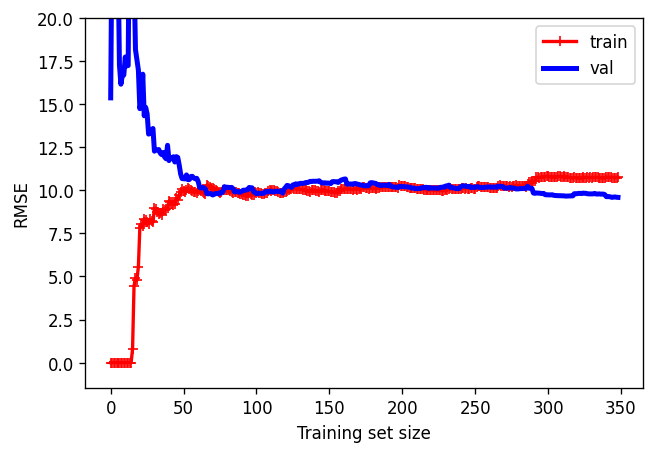

In [25]:
lin_reg=LinearRegression()
# lin_reg = TransformedTargetRegressor(regressor = lin_reg, func = log_transform, inverse_func = inverse_transform)
lin_reg.fit(X_train, y_train)

y_lin_eval = lin_reg.predict(X_train) # Change to X_test

#model evaluation
lin_mse = mean_squared_error(y_lin_eval, y_train)   
lin_rmse = np.sqrt(lin_mse)                        

lin_cv_scores = cross_val_score(lin_reg, X_train, y_train,
scoring="neg_root_mean_squared_error", cv=10)


print('Cross Validation')
display_scores(lin_cv_scores, negative_result = True)


print('The RMSE of Linear Regression is: {:.3f}\n'.format(lin_rmse))

#plotting the learning curve

print('Learning Curve for Linear Regression model:\n')

train_errors = plot_learning_curve(lin_reg, X_train, y_train)

## Random Forest Regressor

A Random Forest Regressor (RFR) was trained using 300 trees, with no maximum depth restriction and bootstrap sampling enabled. The model was evaluated using Root Mean Squared Error (RMSE) and 10-fold cross-validation to assess its predictive performance and generalization ability.

#### Performance Metrics:
	•The training RMSE was 3.937, significantly lower than the validation scores, indicating strong performance on the training data.
	•Cross-validation results yielded an average RMSE of 10.744, with a standard deviation of 1.250, showing lower variability compared to linear regression.
	•Fold-wise RMSE values ranged from 8.927 to 12.577, indicating that the model is more stable.

#### Learning Curve Analysis:
	•The learning curve shows a clear separation between training and validation errors, suggesting overfitting—the model performs well on training data but struggles to generalize to unseen data.
	•The training error remains low, meaning the model captures complex patterns in the training set.

Cross Validation
Scores:
Fold 0 - 11.873
Fold 1 - 9.742
Fold 2 - 10.070
Fold 3 - 8.927
Fold 4 - 12.577
Fold 5 - 11.698
Fold 6 - 9.712
Fold 7 - 11.080
Fold 8 - 12.309
Fold 9 - 9.447

Mean: 10.744
Standard deviation: 1.250


The RMSE of Rfr Regression is: 3.937

Learning Curve for Rfr Regression model:



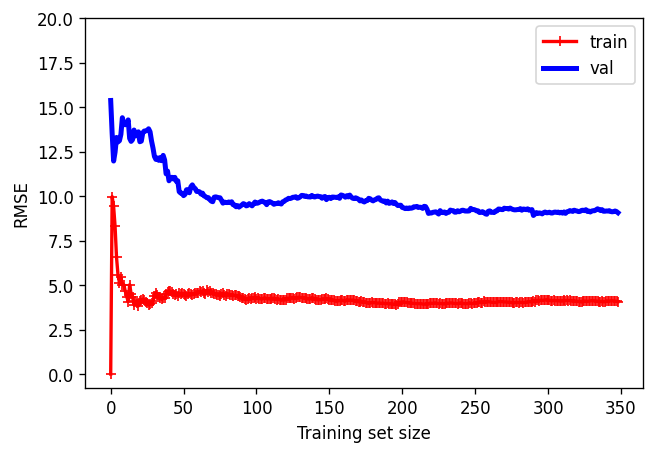

In [26]:
from sklearn.ensemble import RandomForestRegressor

rfr_reg = RandomForestRegressor(
    n_estimators=300,      
    max_depth=None,
    bootstrap=True, 
    random_state=42        
)

rfr_reg.fit(X_train, y_train)

y_eval = rfr_reg.predict(X_train)
y_pred_best=rfr_reg.predict(X_test)
# --- MSE, then take sqrt for RMSE ---
rfr_mse = mean_squared_error(y_train, y_eval) 
rfr_rmse = np.sqrt(rfr_mse)

rfr_cv_scores = cross_val_score(rfr_reg, X_train, y_train,
scoring="neg_root_mean_squared_error", cv=10)

print('Cross Validation')
display_scores(rfr_cv_scores, negative_result = True)

print('The RMSE of Rfr Regression is: {:.3f}\n'.format(rfr_rmse))

#plotting the learning curve
print('Learning Curve for Rfr Regression model:\n')
plot_learning_curve(rfr_reg, X_train, y_train)

## XGBoost Regressor

An XGBoost Regressor was trained with moderate regularization (reg_lambda=2, reg_alpha=1) and hyperparameters such as max_depth=4 and n_estimators=120, wrapped in a log-transform via TransformedTargetRegressor to help linearize the target variable.

Performance Metrics:

	•Training RMSE: 3.937, indicating the model fits the training data very close.
	•Cross-Validation: The average RMSE over 10 folds is 11.145 (±1.537).
	•Fold RMSE scores range from 8.927 to 13.382, reflects moderate variability across different splits of the data.

Learning Curve Insights:

	•The training error decreases rapidly and remains low, while the validation error is notably higher.
	

Cross Validation
Scores:
Fold 0 - 12.518
Fold 1 - 9.925
Fold 2 - 10.424
Fold 3 - 9.940
Fold 4 - 12.752
Fold 5 - 12.185
Fold 6 - 9.327
Fold 7 - 12.342
Fold 8 - 12.688
Fold 9 - 8.739

Mean: 11.084
Standard deviation: 1.479


Learning Curve for XGBoost model:

The training RMSE of XGBoost Regression is: 3.937


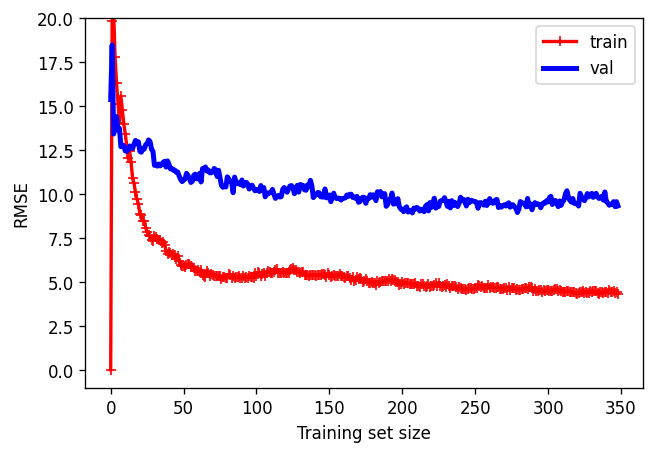

In [27]:
xgb_reg = XGBRegressor(max_depth=4, n_estimators=120, reg_lambda=2, reg_alpha=1, subsample=0.925, colsample_bytree=0.95, verbosity = 0)

xgb_reg = TransformedTargetRegressor(regressor = xgb_reg, func = log_transform, inverse_func = inverse_transform)

xgb_reg.fit(X_train, y_train)

#model prediction
y_pred = xgb_reg.predict(X_test)
y_eval = xgb_reg.predict(X_train)

xgb_mse = mean_squared_error(y_train, y_eval) 
xgb_rmse  = np.sqrt(rfr_mse)

xgb_cv_scores = cross_val_score(xgb_reg, X_train, y_train,
scoring="neg_root_mean_squared_error", cv=10)

print('Cross Validation')
display_scores(xgb_cv_scores, negative_result = True)

print('Learning Curve for XGBoost model:\n')
plot_learning_curve(xgb_reg, X_train, y_train)

print('The training RMSE of XGBoost Regression is: {:.3f}'.format(xgb_rmse))

[Text(0.5, 0, 'Model'), Text(0, 0.5, ' Training RMSE')]

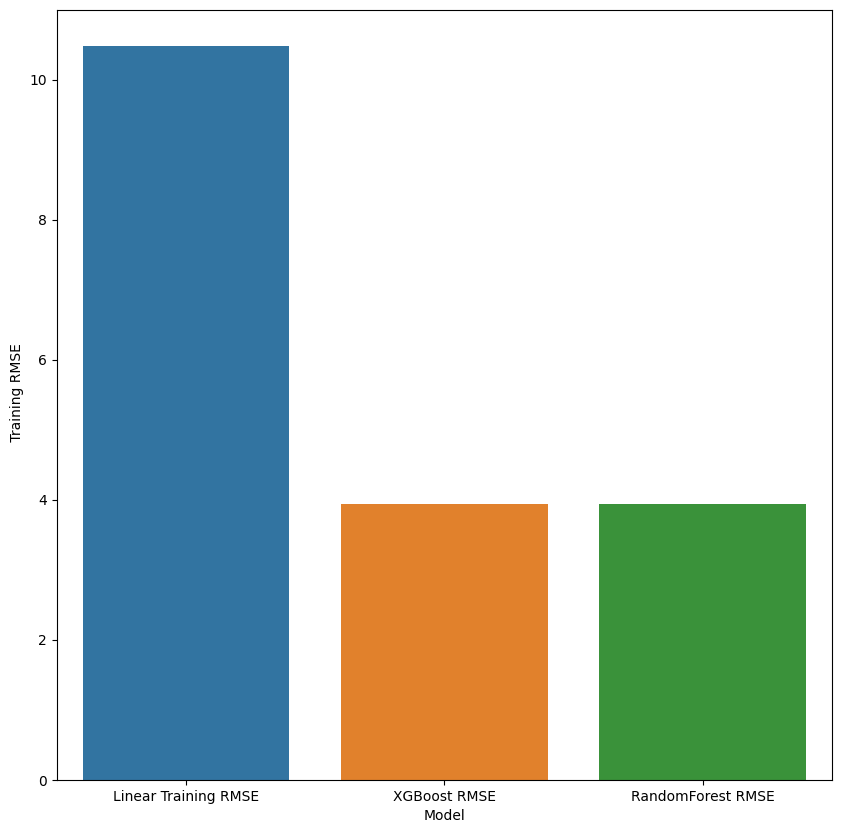

In [32]:
training_RMSE = [lin_rmse, xgb_rmse,rfr_rmse] 
training_RMSE = pd.DataFrame({'Linear Training RMSE':lin_rmse, 'XGBoost RMSE':xgb_rmse, 'RandomForest RMSE':rfr_rmse}, index = training_RMSE)

fig, ax = plt.subplots(figsize = (10,10))
sns.barplot(data = training_RMSE)
ax.set(xlabel='Model', ylabel=' Training RMSE')

*XGBoost RMSE and Random Forest RMSE have higher trainning rmse than linear model due to overfitting. Betweem these two fonts, randomforest has a lightly better performance than XGBoost.*

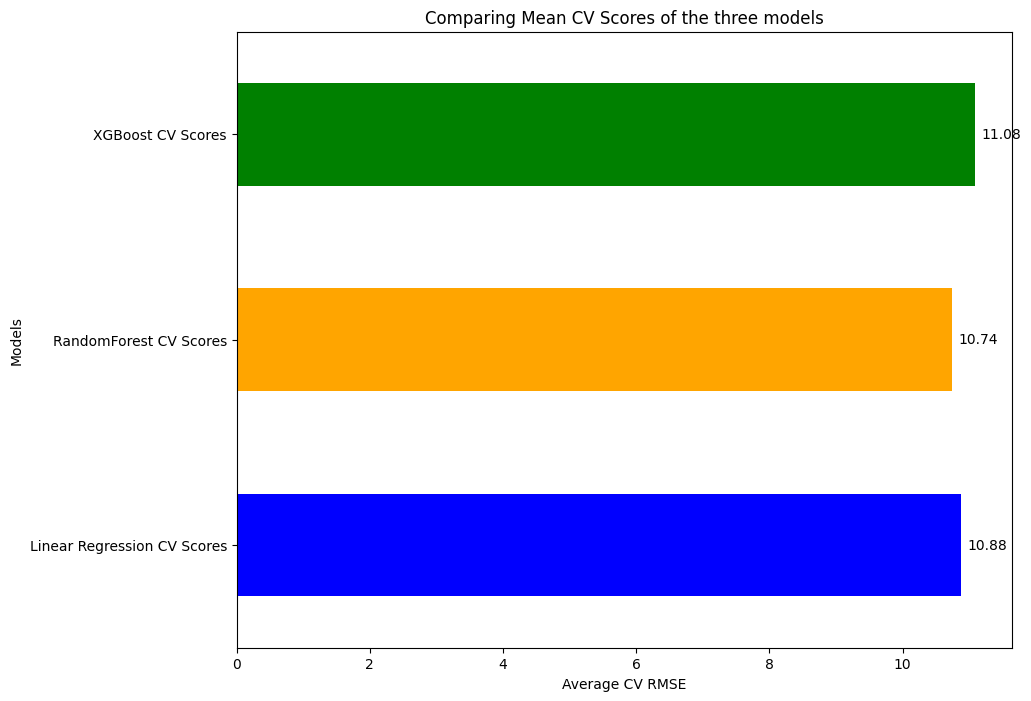

In [38]:
import matplotlib.pyplot as plt

mean_scores = cv_comparison.mean()

ax = mean_scores.plot.barh(
    title='Comparing Mean CV Scores of the three models',
    figsize=(10,8), 
    xlabel='Average CV RMSE', 
    ylabel='Models',
    color=['blue', 'orange', 'green']
)
for i, v in enumerate(mean_scores):
    ax.text(v+0.1, i, f"{v:.2f}", va='center')
plt.show()


### Finalizing Predictions for Submission

In [29]:
len(y_pred)

predictions = pd.DataFrame(data = y_pred_best, columns = ['pop'])

id = pd.DataFrame(data = data_test['Id'], columns = ['Id'])
predictions = pd.merge(id, predictions, right_index = True, left_index = True)

predictions
predictions.to_csv('spotify_regression.csv', index=False)

<a id="conclusions"></a>
## Conclusions

In this project, we explored how numeric and categorical features can be leveraged to predict the popularity of Spotify songs. By iteratively cleaning the data, engineering new features (e.g., combining duration, loudness, and danceability), and applying transformations to reduce skewness and standardize distributions, we ensured that our dataset was well-prepared for modeling.

Three different regression models—Linear Regression, Random Forest, and XGBoost—were then trained and assessed using RMSE as the key performance metric:

	1.Linear Regression provided a good baseline with relatively narrow gaps between training and validation errors.
	2.Random Forest demonstrated strong training performance and captured more complex relationships in the data but faced overfitting, as evident in the gap between training and validation RMSE.
	3.XGBoost offered similarly powerful predictive capabilities and allowed for regularization, yet it also exhibited overfitting. 

Overall, each model contributed valuable insights into the data’s underlying structure and helped identify potential approaches to improving prediction. However, the results may also be influenced by the limitations of the dataset itself, such as the relatively small sample size and potential biases in Spotify’s popularity metric, which is influenced by internal algorithms and external factors like playlist placement and marketing. A larger, more diverse dataset including more songs from various genres, user engagement metrics, or alternative sources could improve model performance and provide a more comprehensive understanding of song popularity. The Randomforest regression model that we model get to the 5th place in the competition finally.